In [1]:
import os
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
from matplotlib import pyplot as plt

In [2]:
layer_number = 5

In [3]:
AdTest_SimCLR_files = os.listdir(".\AdTest_SimCLR_Layers"+str(layer_number)+"_output")

In [4]:
#adtest_SimCLR_layer1 = np.load("./AdTest_SimCLR_Layers_output/H_Layer1.npy")
#adtest_SimCLR_layer2 = np.load("./AdTest_SimCLR_Layers_output/H_Layer2.npy")
#adtest_SimCLR_layer3 = np.load("./AdTest_SimCLR_Layers_output/H_Layer3.npy")

In [5]:
#adtest_MLP_layer1 = np.load("./AdTest_MLP_Layers_output/H_Layer1.npy")
#adtest_MLP_layer2 = np.load("./AdTest_MLP_Layers_output/H_Layer2.npy")
#adtest_MLP_layer3 = np.load("./AdTest_MLP_Layers_output/H_Layer3.npy")

In [6]:
#adtest_SimCLR_layer1 = torch.Tensor(adtest_SimCLR_layer1)
#adtest_SimCLR_layer2 = torch.Tensor(adtest_SimCLR_layer2)
#adtest_SimCLR_layer3 = torch.Tensor(adtest_SimCLR_layer3)

In [7]:
#adtest_MLP_layer1 = torch.Tensor(adtest_MLP_layer1)
#adtest_MLP_layer2 = torch.Tensor(adtest_MLP_layer2)
#adtest_MLP_layer3 = torch.Tensor(adtest_MLP_layer3)

In [8]:
#adtest_MLP_layer1.size()

In [9]:
#cos = nn.CosineSimilarity(dim = 0, eps=1e-6)

In [10]:
#similarity_layer1 = F.cosine_similarity(adtest_SimCLR_layer1, adtest_MLP_layer1)

In [11]:
#similarity_layer1

In [12]:
#for i in range(100):
#    features.append(adtest_SimCLR_layer1[i])
#    features.append(adtest_MLP_layer1[i])
    
# featuresTorch=torch.stack(features)
# features2Torch=featuresTorch.squeeze()
# simlarity=F.cosine_similarity(features2Torch.unsqueeze(1),features2Torch.unsqueeze(0),dim=2)
# plt.figure()
# plt.imshow(simlarity.detach().numpy())

In [13]:
Test_targets = np.load("./AdversarialSamples0/targetsTest-25-model0.npy")
index = []

for i in range(10):
    index_i = np.arange(0,10000)[np.array(Test_targets==i)][:15]
    index.append(index_i)
    
print(len(index[0]))

15


<ipython-input-14-12eb8f535c61>:25: MatplotlibDeprecationWarning: The 'cmap' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  plt.colorbar(cmap="jet")
<ipython-input-14-12eb8f535c61>:22: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


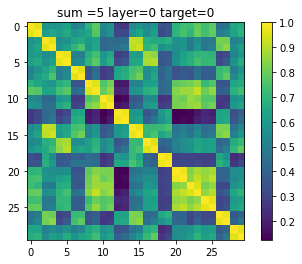

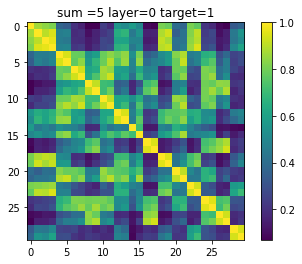

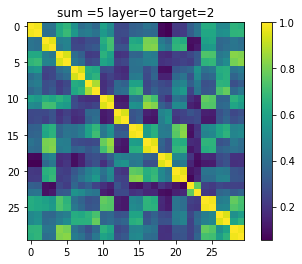

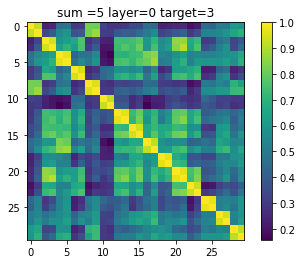

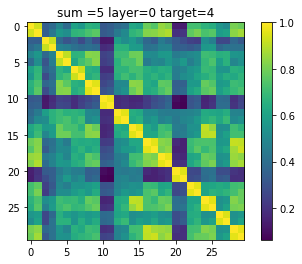

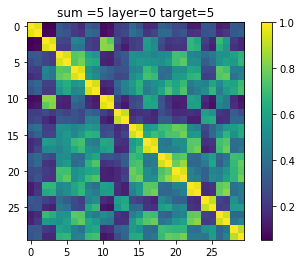

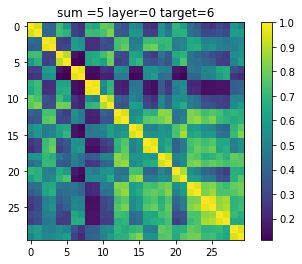

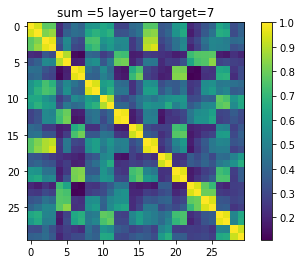

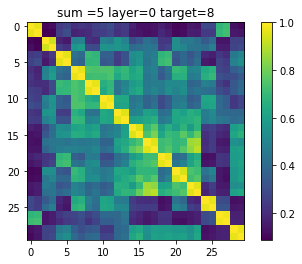

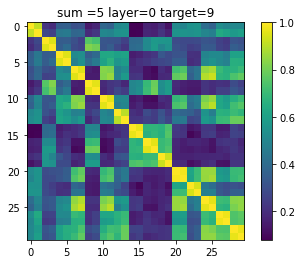

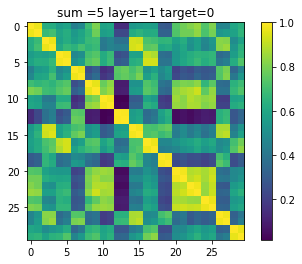

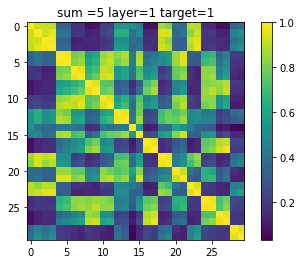

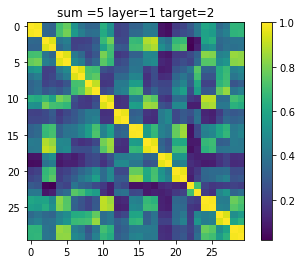

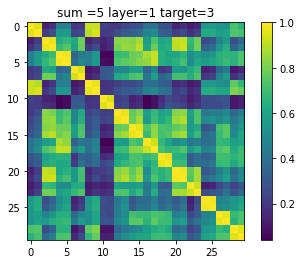

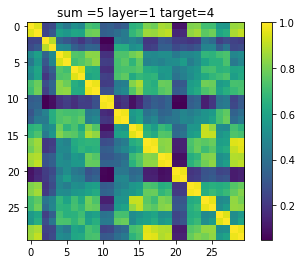

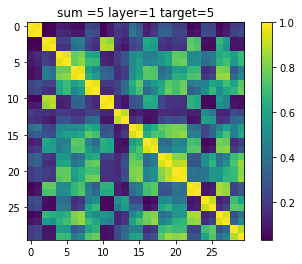

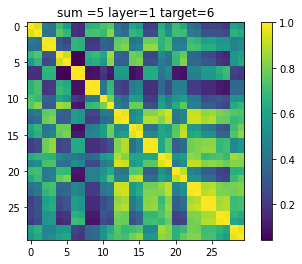

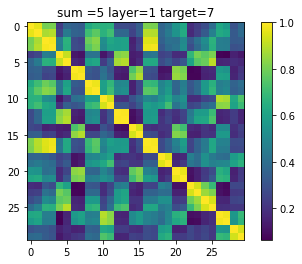

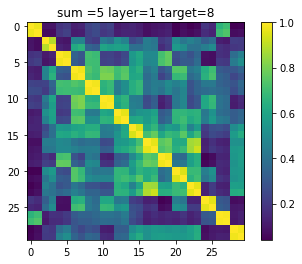

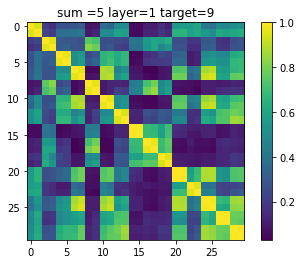

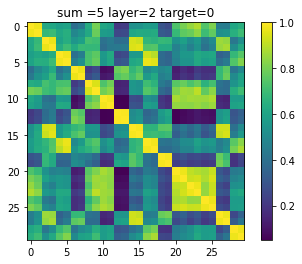

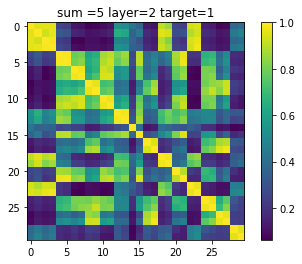

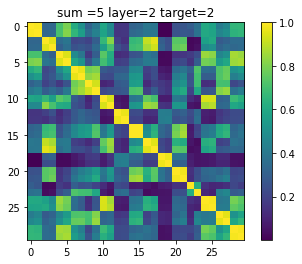

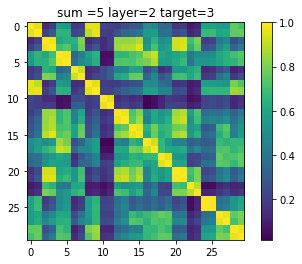

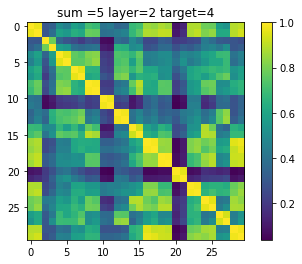

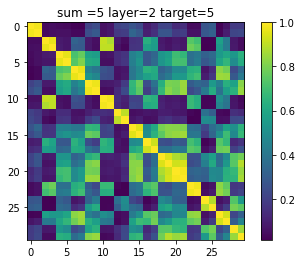

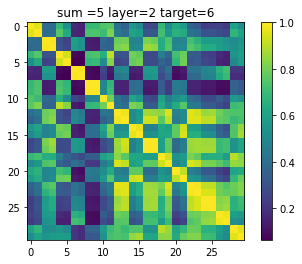

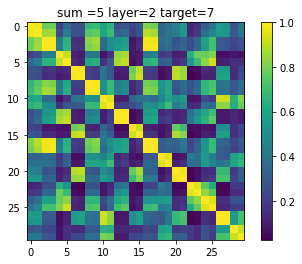

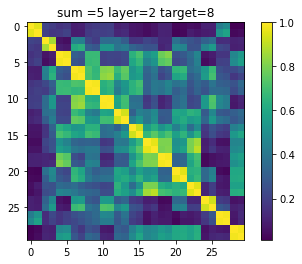

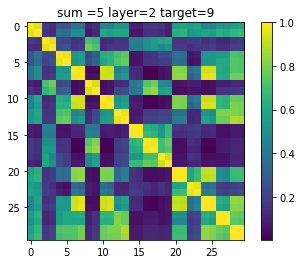

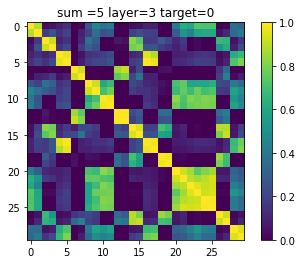

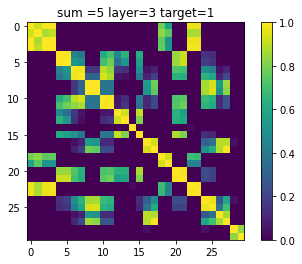

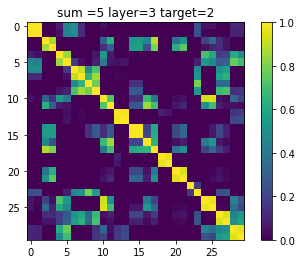

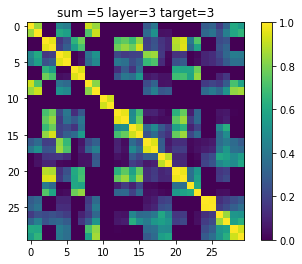

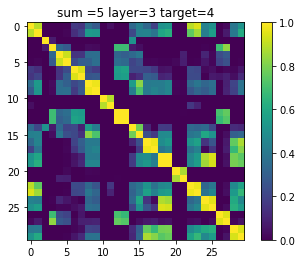

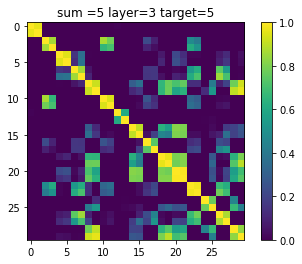

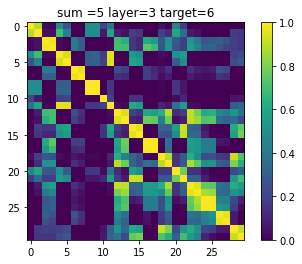

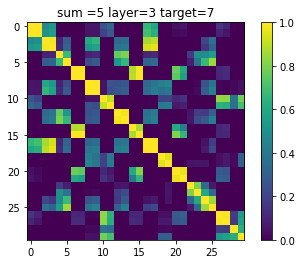

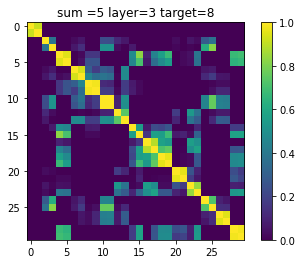

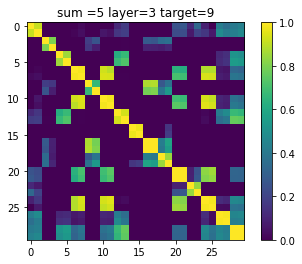

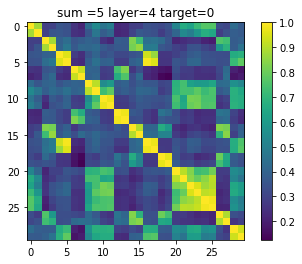

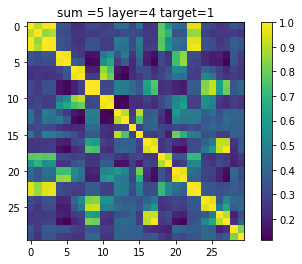

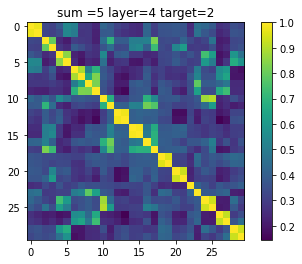

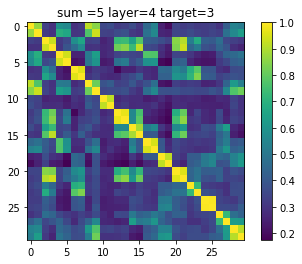

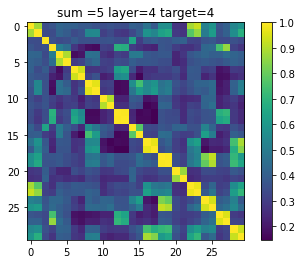

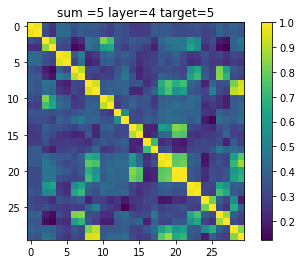

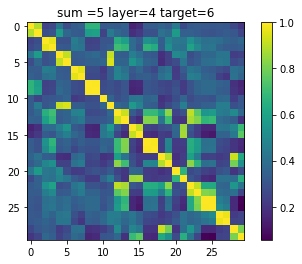

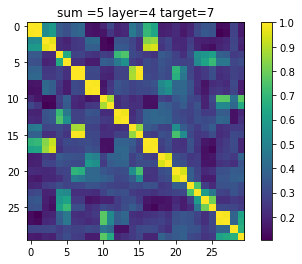

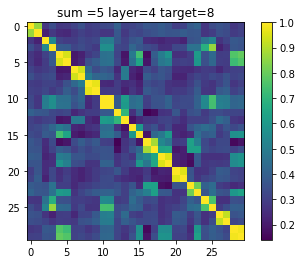

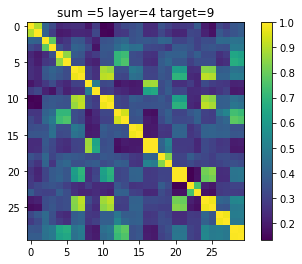

In [14]:
for i in range(len(AdTest_SimCLR_files)):

    adtest_SimCLR_layer = np.load("./AdTest_SimCLR_Layers"+str(len(AdTest_SimCLR_files))+"_output/Layer"+str(i)+".npy")
    adtest_SimCLR_layer = torch.Tensor(adtest_SimCLR_layer)
#    print(adtest_SimCLR_layer[0].size())
    
    test_SimCLR_layer = np.load("./Test_SimCLR_Layers"+str(len(AdTest_SimCLR_files))+"_output/Layer"+str(i)+".npy")
    test_SimCLR_layer = torch.Tensor(test_SimCLR_layer)
#    print(test_SimCLR_layer[0].size())
    
    for j in range(10):

        
        features = []
        for k in index[j]:
            features.append(adtest_SimCLR_layer[k])
            features.append(test_SimCLR_layer[k])

        featuresTorch=torch.stack(features)
        features2Torch=featuresTorch.squeeze()
        simlarity=F.cosine_similarity(features2Torch.unsqueeze(1),features2Torch.unsqueeze(0),dim=2)
        plt.figure()
        plt.imshow(simlarity.detach().numpy())
        plt.title("sum ={} layer={} target={}".format(len(AdTest_SimCLR_files), i,j))
        plt.colorbar(cmap="jet")
        
        plt.savefig('./cos_image/Sum'+str(len(AdTest_SimCLR_files))+'layer'+ str(i)+'_target_'+ str(j)+'.png')
        
       
           
        

    
    

In [15]:
simlarity

tensor([[1.0000, 0.8985, 0.4106, 0.3282, 0.2286, 0.2420, 0.2513, 0.2490, 0.1838,
         0.2848, 0.1387, 0.1490, 0.2729, 0.3207, 0.3390, 0.3622, 0.2419, 0.2430,
         0.3517, 0.3087, 0.2653, 0.2764, 0.2879, 0.3815, 0.2002, 0.1646, 0.3224,
         0.2847, 0.3642, 0.3866],
        [0.8985, 1.0000, 0.4012, 0.2943, 0.1964, 0.2019, 0.2280, 0.2279, 0.2216,
         0.3181, 0.1454, 0.1429, 0.2704, 0.2781, 0.3431, 0.3650, 0.2436, 0.2500,
         0.3184, 0.2626, 0.2218, 0.2290, 0.3182, 0.3109, 0.2154, 0.1756, 0.3704,
         0.3289, 0.3568, 0.3854],
        [0.4106, 0.4012, 1.0000, 0.7839, 0.2456, 0.2736, 0.3700, 0.3650, 0.2776,
         0.2160, 0.3504, 0.3604, 0.4042, 0.4261, 0.3528, 0.3682, 0.3731, 0.3627,
         0.4185, 0.4105, 0.3131, 0.3120, 0.3451, 0.2992, 0.3383, 0.3329, 0.4335,
         0.4297, 0.4588, 0.4578],
        [0.3282, 0.2943, 0.7839, 1.0000, 0.3455, 0.2908, 0.4096, 0.3956, 0.3342,
         0.1799, 0.3714, 0.3745, 0.4345, 0.4823, 0.4461, 0.4529, 0.3228, 0.3176,
       